# Projecto Final


In [50]:
import pandas as pd
import numpy as np

In [51]:
def read_data(filename):
    return pd.read_csv(filename, on_bad_lines='skip')

In [139]:
data_2 = read_data("../Dataset/C - Body posture features 2.csv")
data_4 = read_data("../Dataset/C - Body posture features 4.csv")


cols_2, cols_4 = list(data_2), list(data_4)

data_2 = data_2.rename(columns={"Condition": "C"})

del data_2['Added'] 
del data_2['Blok']

del data_4['Unnamed: 2']

data_2 = data_2.drop_duplicates()
data_4 = data_4.drop_duplicates()

result = pd.concat([data_2, data_4], axis=0)

result['PP'] = result['PP'].astype('category')
result['PP'] = result['PP'].cat.codes

result.head(3)

,PP,C,timestamp,avgDepth(avg),leftShoulderAngle(avg),rightShoulderAngle(avg),leanAngle(avg),HipCenter_Spine-Spine_ShoulderCenter(avg),Spine_ShoulderCenter-ShoulderCenter_Head(avg),Spine_ShoulderCenter-ShoulderCenter_ShoulderLeft(avg),...,WristLeft_HandLeft-PlaneYZAxisZ(stdv),ShoulderRight_ElbowRight-PlaneZXAxisX(stdv),ShoulderRight_ElbowRight-PlaneXYAxisY(stdv),ShoulderRight_ElbowRight-PlaneYZAxisZ(stdv),ElbowRight_WristRight-PlaneZXAxisX(stdv),ElbowRight_WristRight-PlaneXYAxisY(stdv),ElbowRight_WristRight-PlaneYZAxisZ(stdv),WristRight_HandRight-PlaneZXAxisX(stdv),WristRight_HandRight-PlaneXYAxisY(stdv),WristRight_HandRight-KinectZAxis(stdv)
0,0,R,20120818T131600000,2102.597393,-116.055931,115.017758,92.340895,176.389544,155.409463,62.360535,...,166.872086,22.946337,5.605230,13.237048,30.932939,102.460262,8.444481,54.436879,75.886750,155.734343
1,0,R,20120818T131700000,2099.725525,-116.301605,115.986636,92.083385,178.236949,155.185113,61.040639,...,58.237714,7.194860,2.468881,3.886001,2.000359,3.431337,1.160298,4.579341,2.868843,171.486911
2,0,R,20120818T131800000,2102.365778,-115.963089,114.073054,92.381690,170.876998,155.363873,62.764559,...,64.548824,14.726365,2.953021,9.185623,13.379140,48.162012,30.508877,23.013755,30.629061,149.748809


In [140]:
len(cols_2), len(cols_4)

(99, 98)

In [141]:
common_features = list(set(cols_2) & set(cols_4))

len(common_features)

96

In [142]:
common_features

['ShoulderCenter_ShoulderRight-PlaneYZAxisZ(avg)',
 'ElbowLeft_WristLeft-WristLeft_HandLeft(avg)',
 'avgDepth(stdv)',
 'ShoulderRight_ElbowRight-PlaneYZAxisZ(avg)',
 'ShoulderRight_ElbowRight-PlaneXYAxisY(stdv)',
 'ShoulderCenter_ShoulderLeft-PlaneZXAxisX(stdv)',
 'rightShoulderAngle(stdv)',
 'ShoulderCenter_ShoulderLeft-PlaneYZAxisZ(stdv)',
 'ElbowRight_WristRight-PlaneXYAxisY(stdv)',
 'ShoulderRight_ElbowRight-ElbowRight_WristRight(stdv)',
 'ShoulderCenter_ShoulderRight-PlaneZXAxisX(stdv)',
 'ElbowRight_WristRight-WristRight_HandRight(stdv)',
 'Spine_ShoulderCenter-PlaneXYAxisY(avg)',
 'ElbowLeft_WristLeft-PlaneZXAxisX(avg)',
 'leanAngle(avg)',
 'HipCenter_Spine-PlaneXYAxisY(stdv)',
 'ShoulderLeft_ElbowLeft-ElbowLeft_WristLeft(avg)',
 'ShoulderCenter_ShoulderRight-PlaneZXAxisX(avg)',
 'ShoulderLeft_ElbowLeft-ElbowLeft_WristLeft(stdv)',
 'Spine_ShoulderCenter-PlaneZXAxisX(stdv)',
 'ShoulderCenter_Head-PlaneZXAxisX(stdv)',
 'Spine_ShoulderCenter-ShoulderCenter_ShoulderRight(stdv)',
 'E

In [143]:
set(cols_2) - set(common_features)

{'Added', 'Blok', 'Condition'}

In [144]:
set(cols_4) - set(common_features)

{'C', 'Unnamed: 2'}

In [145]:
data_2.shape, data_4.shape

((3139, 97), (3235, 97))

In [ ]:
cols_2 = list(data_2)
cols_4 = list(data_4)

common_features = list( set(cols_2) & set(cols_4))

common_features

['ShoulderCenter_ShoulderRight-PlaneYZAxisZ(avg)',
 'ElbowLeft_WristLeft-WristLeft_HandLeft(avg)',
 'avgDepth(stdv)',
 'ShoulderRight_ElbowRight-PlaneYZAxisZ(avg)',
 'ShoulderRight_ElbowRight-PlaneXYAxisY(stdv)',
 'ShoulderCenter_ShoulderLeft-PlaneZXAxisX(stdv)',
 'rightShoulderAngle(stdv)',
 'ShoulderCenter_ShoulderLeft-PlaneYZAxisZ(stdv)',
 'ElbowRight_WristRight-PlaneXYAxisY(stdv)',
 'ShoulderRight_ElbowRight-ElbowRight_WristRight(stdv)',
 'ShoulderCenter_ShoulderRight-PlaneZXAxisX(stdv)',
 'ElbowRight_WristRight-WristRight_HandRight(stdv)',
 'Spine_ShoulderCenter-PlaneXYAxisY(avg)',
 'ElbowLeft_WristLeft-PlaneZXAxisX(avg)',
 'leanAngle(avg)',
 'HipCenter_Spine-PlaneXYAxisY(stdv)',
 'ShoulderLeft_ElbowLeft-ElbowLeft_WristLeft(avg)',
 'ShoulderCenter_ShoulderRight-PlaneZXAxisX(avg)',
 'ShoulderLeft_ElbowLeft-ElbowLeft_WristLeft(stdv)',
 'Spine_ShoulderCenter-PlaneZXAxisX(stdv)',
 'ShoulderCenter_Head-PlaneZXAxisX(stdv)',
 'Spine_ShoulderCenter-ShoulderCenter_ShoulderRight(stdv)',
 'E

In [147]:
list(result)

['PP',
 'C',
 'timestamp',
 'avgDepth(avg)',
 'leftShoulderAngle(avg)',
 'rightShoulderAngle(avg)',
 'leanAngle(avg)',
 'HipCenter_Spine-Spine_ShoulderCenter(avg)',
 'Spine_ShoulderCenter-ShoulderCenter_Head(avg)',
 'Spine_ShoulderCenter-ShoulderCenter_ShoulderLeft(avg)',
 'Spine_ShoulderCenter-ShoulderCenter_ShoulderRight(avg)',
 'ShoulderCenter_ShoulderLeft-ShoulderLeft_ElbowLeft(avg)',
 'ShoulderLeft_ElbowLeft-ElbowLeft_WristLeft(avg)',
 'ElbowLeft_WristLeft-WristLeft_HandLeft(avg)',
 'ShoulderCenter_ShoulderRight-ShoulderRight_ElbowRight(avg)',
 'ShoulderRight_ElbowRight-ElbowRight_WristRight(avg)',
 'ElbowRight_WristRight-WristRight_HandRight(avg)',
 'HipCenter_Spine-PlaneZXAxisX(avg)',
 'HipCenter_Spine-PlaneXYAxisY(avg)',
 'HipCenter_Spine-PlaneYZAxisZ(avg)',
 'Spine_ShoulderCenter-PlaneZXAxisX(avg)',
 'Spine_ShoulderCenter-PlaneXYAxisY(avg)',
 'Spine_ShoulderCenter-PlaneYZAxisZ(avg)',
 'ShoulderCenter_Head-PlaneZXAxisX(avg)',
 'ShoulderCenter_Head-PlaneXYAxisY(avg)',
 'Shoulder

In [148]:
result.head(5)

,PP,C,timestamp,avgDepth(avg),leftShoulderAngle(avg),rightShoulderAngle(avg),leanAngle(avg),HipCenter_Spine-Spine_ShoulderCenter(avg),Spine_ShoulderCenter-ShoulderCenter_Head(avg),Spine_ShoulderCenter-ShoulderCenter_ShoulderLeft(avg),...,WristLeft_HandLeft-PlaneYZAxisZ(stdv),ShoulderRight_ElbowRight-PlaneZXAxisX(stdv),ShoulderRight_ElbowRight-PlaneXYAxisY(stdv),ShoulderRight_ElbowRight-PlaneYZAxisZ(stdv),ElbowRight_WristRight-PlaneZXAxisX(stdv),ElbowRight_WristRight-PlaneXYAxisY(stdv),ElbowRight_WristRight-PlaneYZAxisZ(stdv),WristRight_HandRight-PlaneZXAxisX(stdv),WristRight_HandRight-PlaneXYAxisY(stdv),WristRight_HandRight-KinectZAxis(stdv)
0,0,R,20120818T131600000,2102.597393,-116.055931,115.017758,92.340895,176.389544,155.409463,62.360535,...,166.872086,22.946337,5.605230,13.237048,30.932939,102.460262,8.444481,54.436879,75.886750,155.734343
1,0,R,20120818T131700000,2099.725525,-116.301605,115.986636,92.083385,178.236949,155.185113,61.040639,...,58.237714,7.194860,2.468881,3.886001,2.000359,3.431337,1.160298,4.579341,2.868843,171.486911
2,0,R,20120818T131800000,2102.365778,-115.963089,114.073054,92.381690,170.876998,155.363873,62.764559,...,64.548824,14.726365,2.953021,9.185623,13.379140,48.162012,30.508877,23.013755,30.629061,149.748809
3,0,R,20120818T131900000,2104.116968,-115.629630,113.972465,92.428905,168.248852,156.627814,62.429551,...,38.209895,2.542686,1.564318,2.453674,4.796273,8.223865,1.114906,3.854074,4.048611,173.149430
4,0,R,20120818T132000000,2105.284007,-116.359699,111.538437,92.461537,166.050980,152.687506,65.428302,...,80.171422,9.905241,20.342488,5.552234,7.198096,22.942488,46.386278,17.514534,29.702675,165.368301


In [149]:
result.dtypes

PP                                                                int8
C                                                               object
timestamp                                                       object
avgDepth(avg)                                                  float64
leftShoulderAngle(avg)                                         float64
rightShoulderAngle(avg)                                        float64
leanAngle(avg)                                                 float64
HipCenter_Spine-Spine_ShoulderCenter(avg)                      float64
Spine_ShoulderCenter-ShoulderCenter_Head(avg)                  float64
Spine_ShoulderCenter-ShoulderCenter_ShoulderLeft(avg)          float64
Spine_ShoulderCenter-ShoulderCenter_ShoulderRight(avg)         float64
ShoulderCenter_ShoulderLeft-ShoulderLeft_ElbowLeft(avg)        float64
ShoulderLeft_ElbowLeft-ElbowLeft_WristLeft(avg)                float64
ElbowLeft_WristLeft-WristLeft_HandLeft(avg)                    float64
Should

In [150]:
pd.set_option('display.max_rows',None)
result.isna().sum()



PP                                                               0
C                                                                0
timestamp                                                        0
avgDepth(avg)                                                  398
leftShoulderAngle(avg)                                         398
rightShoulderAngle(avg)                                        414
leanAngle(avg)                                                 414
HipCenter_Spine-Spine_ShoulderCenter(avg)                      414
Spine_ShoulderCenter-ShoulderCenter_Head(avg)                  414
Spine_ShoulderCenter-ShoulderCenter_ShoulderLeft(avg)          414
Spine_ShoulderCenter-ShoulderCenter_ShoulderRight(avg)         414
ShoulderCenter_ShoulderLeft-ShoulderLeft_ElbowLeft(avg)        414
ShoulderLeft_ElbowLeft-ElbowLeft_WristLeft(avg)                414
ElbowLeft_WristLeft-WristLeft_HandLeft(avg)                    414
ShoulderCenter_ShoulderRight-ShoulderRight_ElbowRight(avg)    

In [151]:
def fill_nan_with_mode(df, variables):
    for variable in variables:
        df[variable].fillna(df[variable].mode()[0], inplace=True)
    return df


def convert_object_to_number(df):

    # Select numeric columns.
    a = df.select_dtypes('number')
    # Select string and object columns.
    b = df.select_dtypes('object')

    # Fill numeric columns with mean.
    df[a.columns] = a.fillna(a.mean())
    # Fill object columns with mode.
    df[b.columns] = b.fillna(b.agg(lambda x: x.mode().values[0]))

    return df

def convert_to_number(df, variables):
    """
        Convert data frame type from object to number
    """
    for variable in variables:
        df[variable] = pd.to_numeric(df[variable],errors = 'coerce')
    return df

result = fill_nan_with_mode(result, common_features)
result = convert_object_to_number(result)
common_features.remove('timestamp')
result = convert_to_number(result, common_features)



In [116]:
result.head(5)

,PP,C,timestamp,avgDepth(avg),leftShoulderAngle(avg),rightShoulderAngle(avg),leanAngle(avg),HipCenter_Spine-Spine_ShoulderCenter(avg),Spine_ShoulderCenter-ShoulderCenter_Head(avg),Spine_ShoulderCenter-ShoulderCenter_ShoulderLeft(avg),...,WristLeft_HandLeft-PlaneYZAxisZ(stdv),ShoulderRight_ElbowRight-PlaneZXAxisX(stdv),ShoulderRight_ElbowRight-PlaneXYAxisY(stdv),ShoulderRight_ElbowRight-PlaneYZAxisZ(stdv),ElbowRight_WristRight-PlaneZXAxisX(stdv),ElbowRight_WristRight-PlaneXYAxisY(stdv),ElbowRight_WristRight-PlaneYZAxisZ(stdv),WristRight_HandRight-PlaneZXAxisX(stdv),WristRight_HandRight-PlaneXYAxisY(stdv),WristRight_HandRight-KinectZAxis(stdv)
0,10,3,20120919T112800000,2124.444782,-124.487000,119.393460,94.645763,161.598744,158.028685,57.529067,...,131.744941,48.518434,96.675450,29.914570,105.385553,123.796046,112.184764,72.707303,118.779576,116.976149
1,10,3,20120919T112900000,2105.473726,-122.562837,130.210867,93.869286,177.669064,168.083793,64.061200,...,7.878123,11.066999,26.875492,11.422892,11.609428,21.937329,44.269512,17.441777,18.783747,23.816289
2,10,3,20120919T113000000,2113.438714,-125.134205,123.141093,91.727577,156.326105,166.499484,60.526961,...,45.656233,33.792328,26.948912,18.514758,12.762372,29.306397,146.868469,51.107894,76.796122,140.406369
3,10,3,20120919T113100000,2122.015890,-126.875087,113.636065,91.047147,137.482004,164.848127,59.276033,...,130.257229,11.436982,2.790799,2.094171,9.237335,3.639870,6.735431,11.834226,3.715964,6.931145
4,10,3,20120919T113200000,2122.833150,-128.163098,114.759226,91.149373,137.691976,166.072214,58.875647,...,110.053524,5.330499,3.169784,1.673699,5.452169,2.838477,3.269055,47.788075,2.591220,2.958849


In [152]:

result = result.dropna(axis=0, how='any')
result = result[result.PP != 0]


result.shape

(3193, 97)

In [153]:
result.head(5)

,PP,C,timestamp,avgDepth(avg),leftShoulderAngle(avg),rightShoulderAngle(avg),leanAngle(avg),HipCenter_Spine-Spine_ShoulderCenter(avg),Spine_ShoulderCenter-ShoulderCenter_Head(avg),Spine_ShoulderCenter-ShoulderCenter_ShoulderLeft(avg),...,WristLeft_HandLeft-PlaneYZAxisZ(stdv),ShoulderRight_ElbowRight-PlaneZXAxisX(stdv),ShoulderRight_ElbowRight-PlaneXYAxisY(stdv),ShoulderRight_ElbowRight-PlaneYZAxisZ(stdv),ElbowRight_WristRight-PlaneZXAxisX(stdv),ElbowRight_WristRight-PlaneXYAxisY(stdv),ElbowRight_WristRight-PlaneYZAxisZ(stdv),WristRight_HandRight-PlaneZXAxisX(stdv),WristRight_HandRight-PlaneXYAxisY(stdv),WristRight_HandRight-KinectZAxis(stdv)
42,11,1.0,20120819T131000000,2148.148044,-105.303654,92.976869,110.304687,173.198135,150.747382,68.874142,...,56.035892,35.609986,24.677761,48.337341,66.290060,90.753288,29.661084,113.096558,72.751337,83.534556
43,11,1.0,20120819T131100000,2141.555641,-119.865549,116.970106,105.221431,167.076042,160.776279,65.179659,...,92.069211,29.500384,28.870534,34.113915,102.674821,64.753957,149.079252,102.764193,82.626145,141.892193
44,11,1.0,20120819T131200000,2150.708977,-119.306144,113.207611,87.085051,113.556293,162.283526,61.757274,...,20.052541,24.973770,7.721495,14.899988,94.223561,85.091626,114.137552,96.925605,70.652516,108.186272
45,11,1.0,20120819T131300000,2150.846173,-118.217235,113.540659,85.949118,116.544441,159.994281,64.075715,...,89.392439,30.398608,76.962176,59.639678,81.067009,99.466771,122.690758,87.972791,87.925760,130.291225
46,11,1.0,20120819T131400000,2147.786499,-107.073498,113.975503,88.140086,109.561122,153.933285,71.049329,...,4.921430,22.415369,37.140873,20.139721,44.471020,63.523312,121.794076,74.034702,122.099296,138.177254


## Escribir dataset limpio a un archivo

In [135]:
result.to_csv('../Dataset/generated/C_cleaned.csv', index=False) 

# Estudio outlier

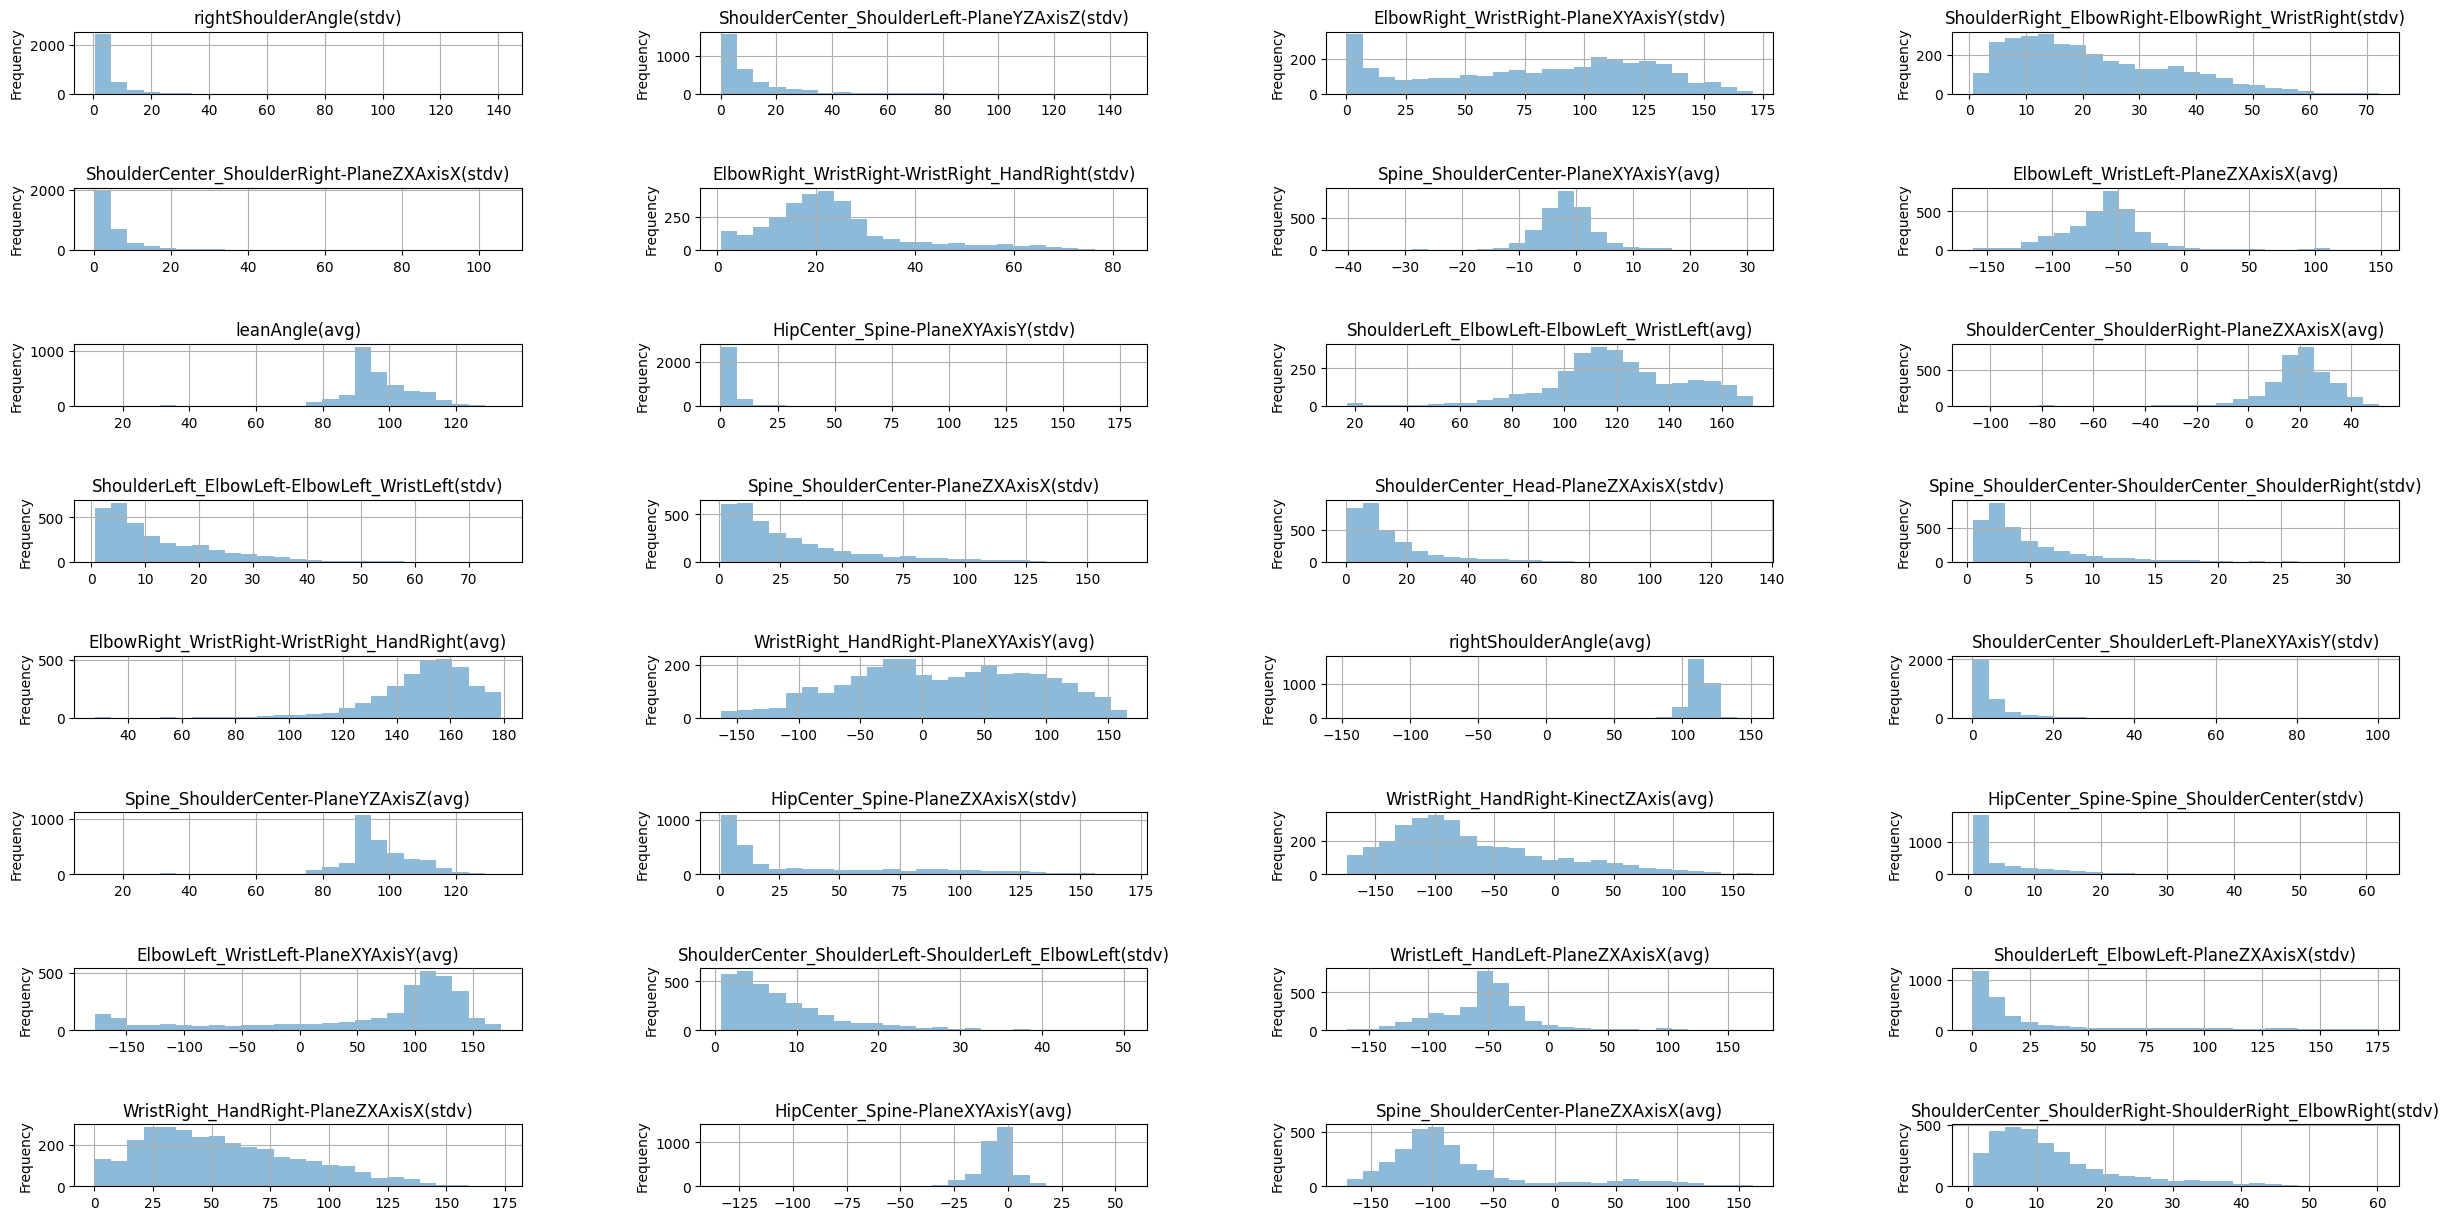

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(30, 50))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)

for ix in range(32):
    variable = common_features[5:][1+ix]
    plt.subplot(32,4,1+ix)
    result[variable].plot.hist(alpha=0.5, bins=25, grid = True)
    plt.title(variable)
    #plt.xlabel(variable)


plt.show()


## Estudio de correlación

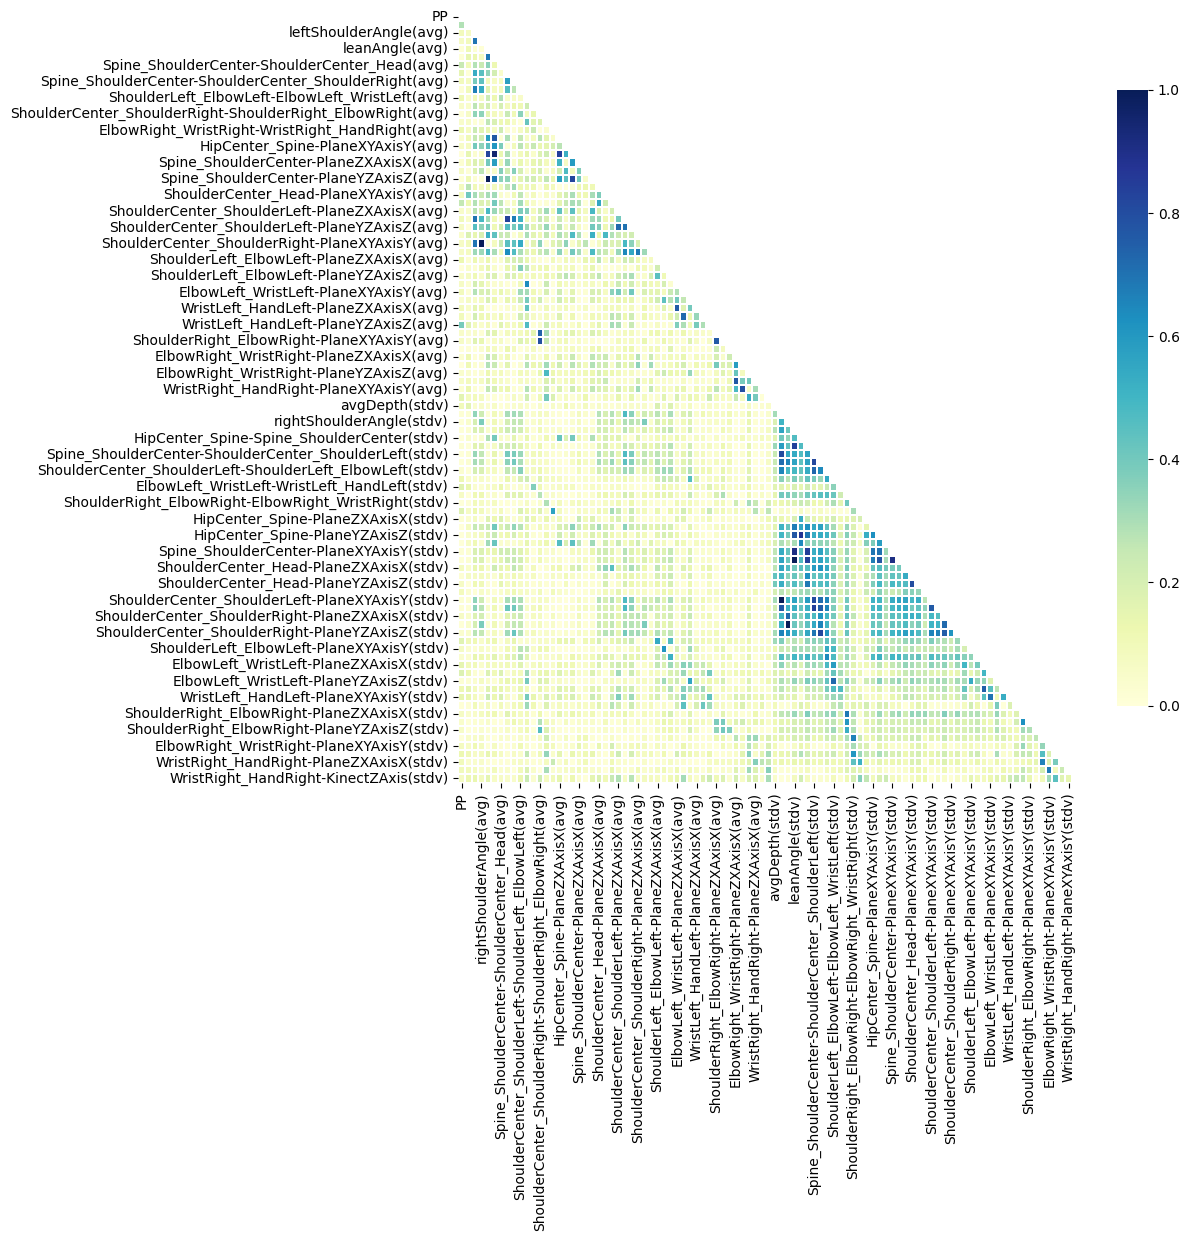

In [155]:
import seaborn as sns

def matriz_correlacion(df):
    # Compute the correlation matrix
    corr = np.abs(result.drop(['C'], axis=1).corr())

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(10, 10))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
                linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

    plt.show()

result = result.drop('timestamp', axis=1)
matriz_correlacion(result)